# Supervised Learning - Grocery

In this Project, we are going to perform a full unsupervised learning machine learning project on a "Wholesale Data" dataset. The dataset refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories

[Kaggle Link](https://www.kaggle.com/datasets/binovi/wholesale-customers-data-set)

# Part I : EDA - Exploratory Data Analysis & Pre-processing

The given dataset seems to be a grocery sales dataset containing information about various products sold by a grocery store. To perform an exploratory data analysis (EDA) on this dataset, we can perform the following tasks:

- Data Import: Import the dataset into a statistical software tool such as Python or R.
- Data Cleaning: Check the dataset for any missing or incorrect data and clean the dataset accordingly. This may involve removing or imputing missing data or correcting any obvious errors.
Data Description: Generate summary statistics such as mean, median, and standard deviation for each column of the dataset. This will help in understanding the distribution of data in each column.
- Data Visualization: Create various visualizations such as histograms, box plots, scatter plots, and heatmaps to understand the relationships and trends between the different variables in the dataset. For example, we can create a scatter plot between the "Fresh" and "Milk" variables to see if there is any correlation between them.
- Outlier Detection: Check for any outliers in the dataset and determine whether they are valid or erroneous data points.
- Correlation Analysis: Calculate the correlation between different variables in the dataset to determine which variables are highly correlated and which ones are not. For example, we can calculate the correlation between "Grocery" and "Detergents_Paper" to see if there is any relationship between these two variables.
- Data Transformation: If necessary, transform the data by standardizing or normalizing the variables to make them comparable across different scales.
- Feature Selection: Identify the most important features or variables that contribute the most to the overall variance in the dataset. This can be done using various feature selection techniques such as principal component analysis (PCA) or random forest regression.

### Import and Library setup

In [33]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# import Kmeans from sklearn
from sklearn.cluster import KMeans 

# aglomerative clustering
from sklearn.cluster import AgglomerativeClustering

# cluster hierarchy
import scipy.cluster.hierarchy as sch

# import DBSCAN
from sklearn.cluster import DBSCAN


In [2]:
#Import dataset and save as dataframe

data_raw = pd.read_csv('Wholesale_Data.csv')
data_raw.head(6)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
5,2,3,9413,8259,5126,666,1795,1451


In [3]:
data_raw.shape
#data is 440 row with 8 features. 
# in this case we are not attempting to 'predict', so there is no 'target'

(440, 8)

## Descriptive Statistics

In [4]:
data_raw.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [5]:
data_raw.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


We can see: 
1. The data is all numeric - no need to encode. 
2. There are no null values - no need to imput nulls. 

## Visualize Data Set. 

1. Pair Plot
2. Correlation Matrix
3. Heatmap

c:\Users\jamie\anaconda3\envs\Lighthouse_env\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


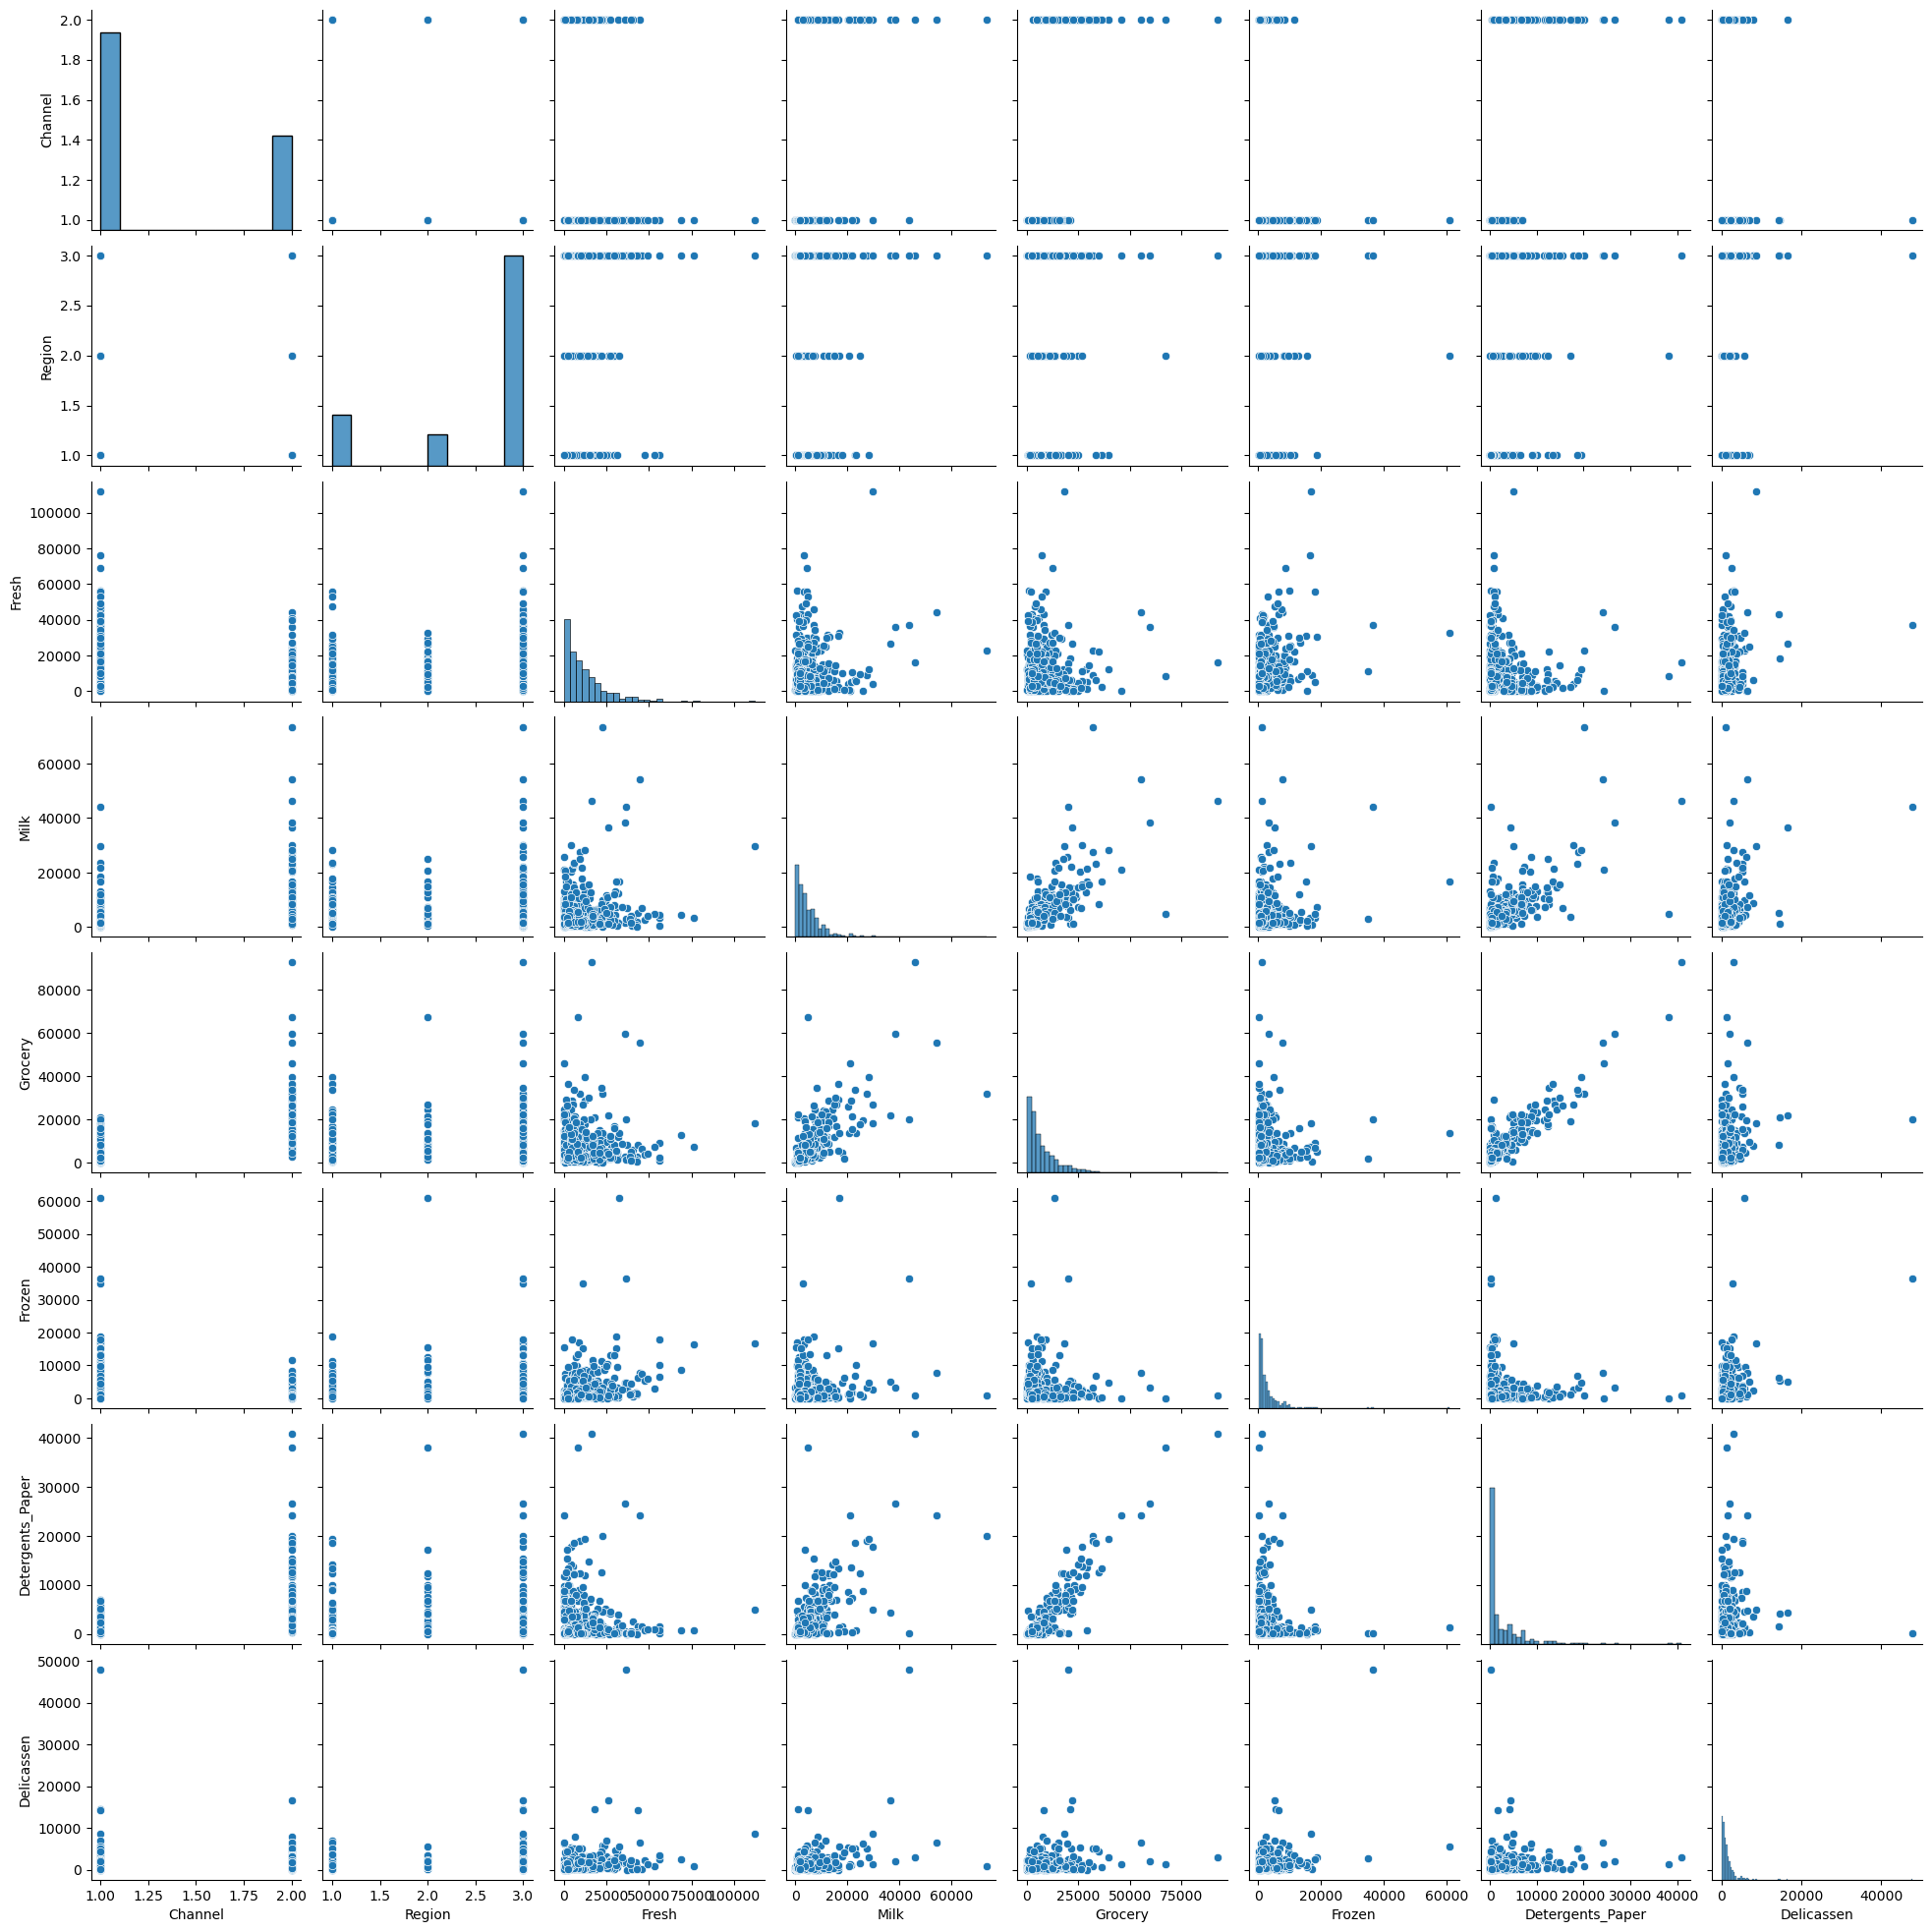

In [89]:
### Visualzie relationships

sns.pairplot(data=data_raw)
plt.show()

**Observations from EDA**
1. Features with continuous variables (fresh, grocery, milk, etc) have righ-skewed disitrbutions. 
2. Deli - there appears to be no correlation between deli and any other category. 
3. Relatively strong correlations are apparent between Grocery:Detergents, Grocery:Milk. 
4. Correlation between Milk:Detergents is apparent at low end, but homoskedacity increases significantly.   
   
 **  Next Action: **
   - Review log-transform of continuous data
  

## Transform Data & Visualize

In [7]:
## Log Transform Categorical data. 

columns_to_tranform = data_raw.columns[2:]
columns_to_tranform

data_raw_log = data_raw.copy()

for colums in columns_to_tranform:
                    data_raw_log[f'{colums}_log'] = np.log(data_raw_log[colums])
                    data_raw_log.drop(colums, axis=1, inplace=True)

# Declare X (less typing, more)
X = data_raw_log



**Note about Scaling**:

- original data would require scaling given the breadth of values across features. 
- Given the log-trainsformation to address the right-skew, the requirement for scaling is less prominent. 
- Further scaling the data will be deferred for now.

c:\Users\jamie\anaconda3\envs\Lighthouse_env\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


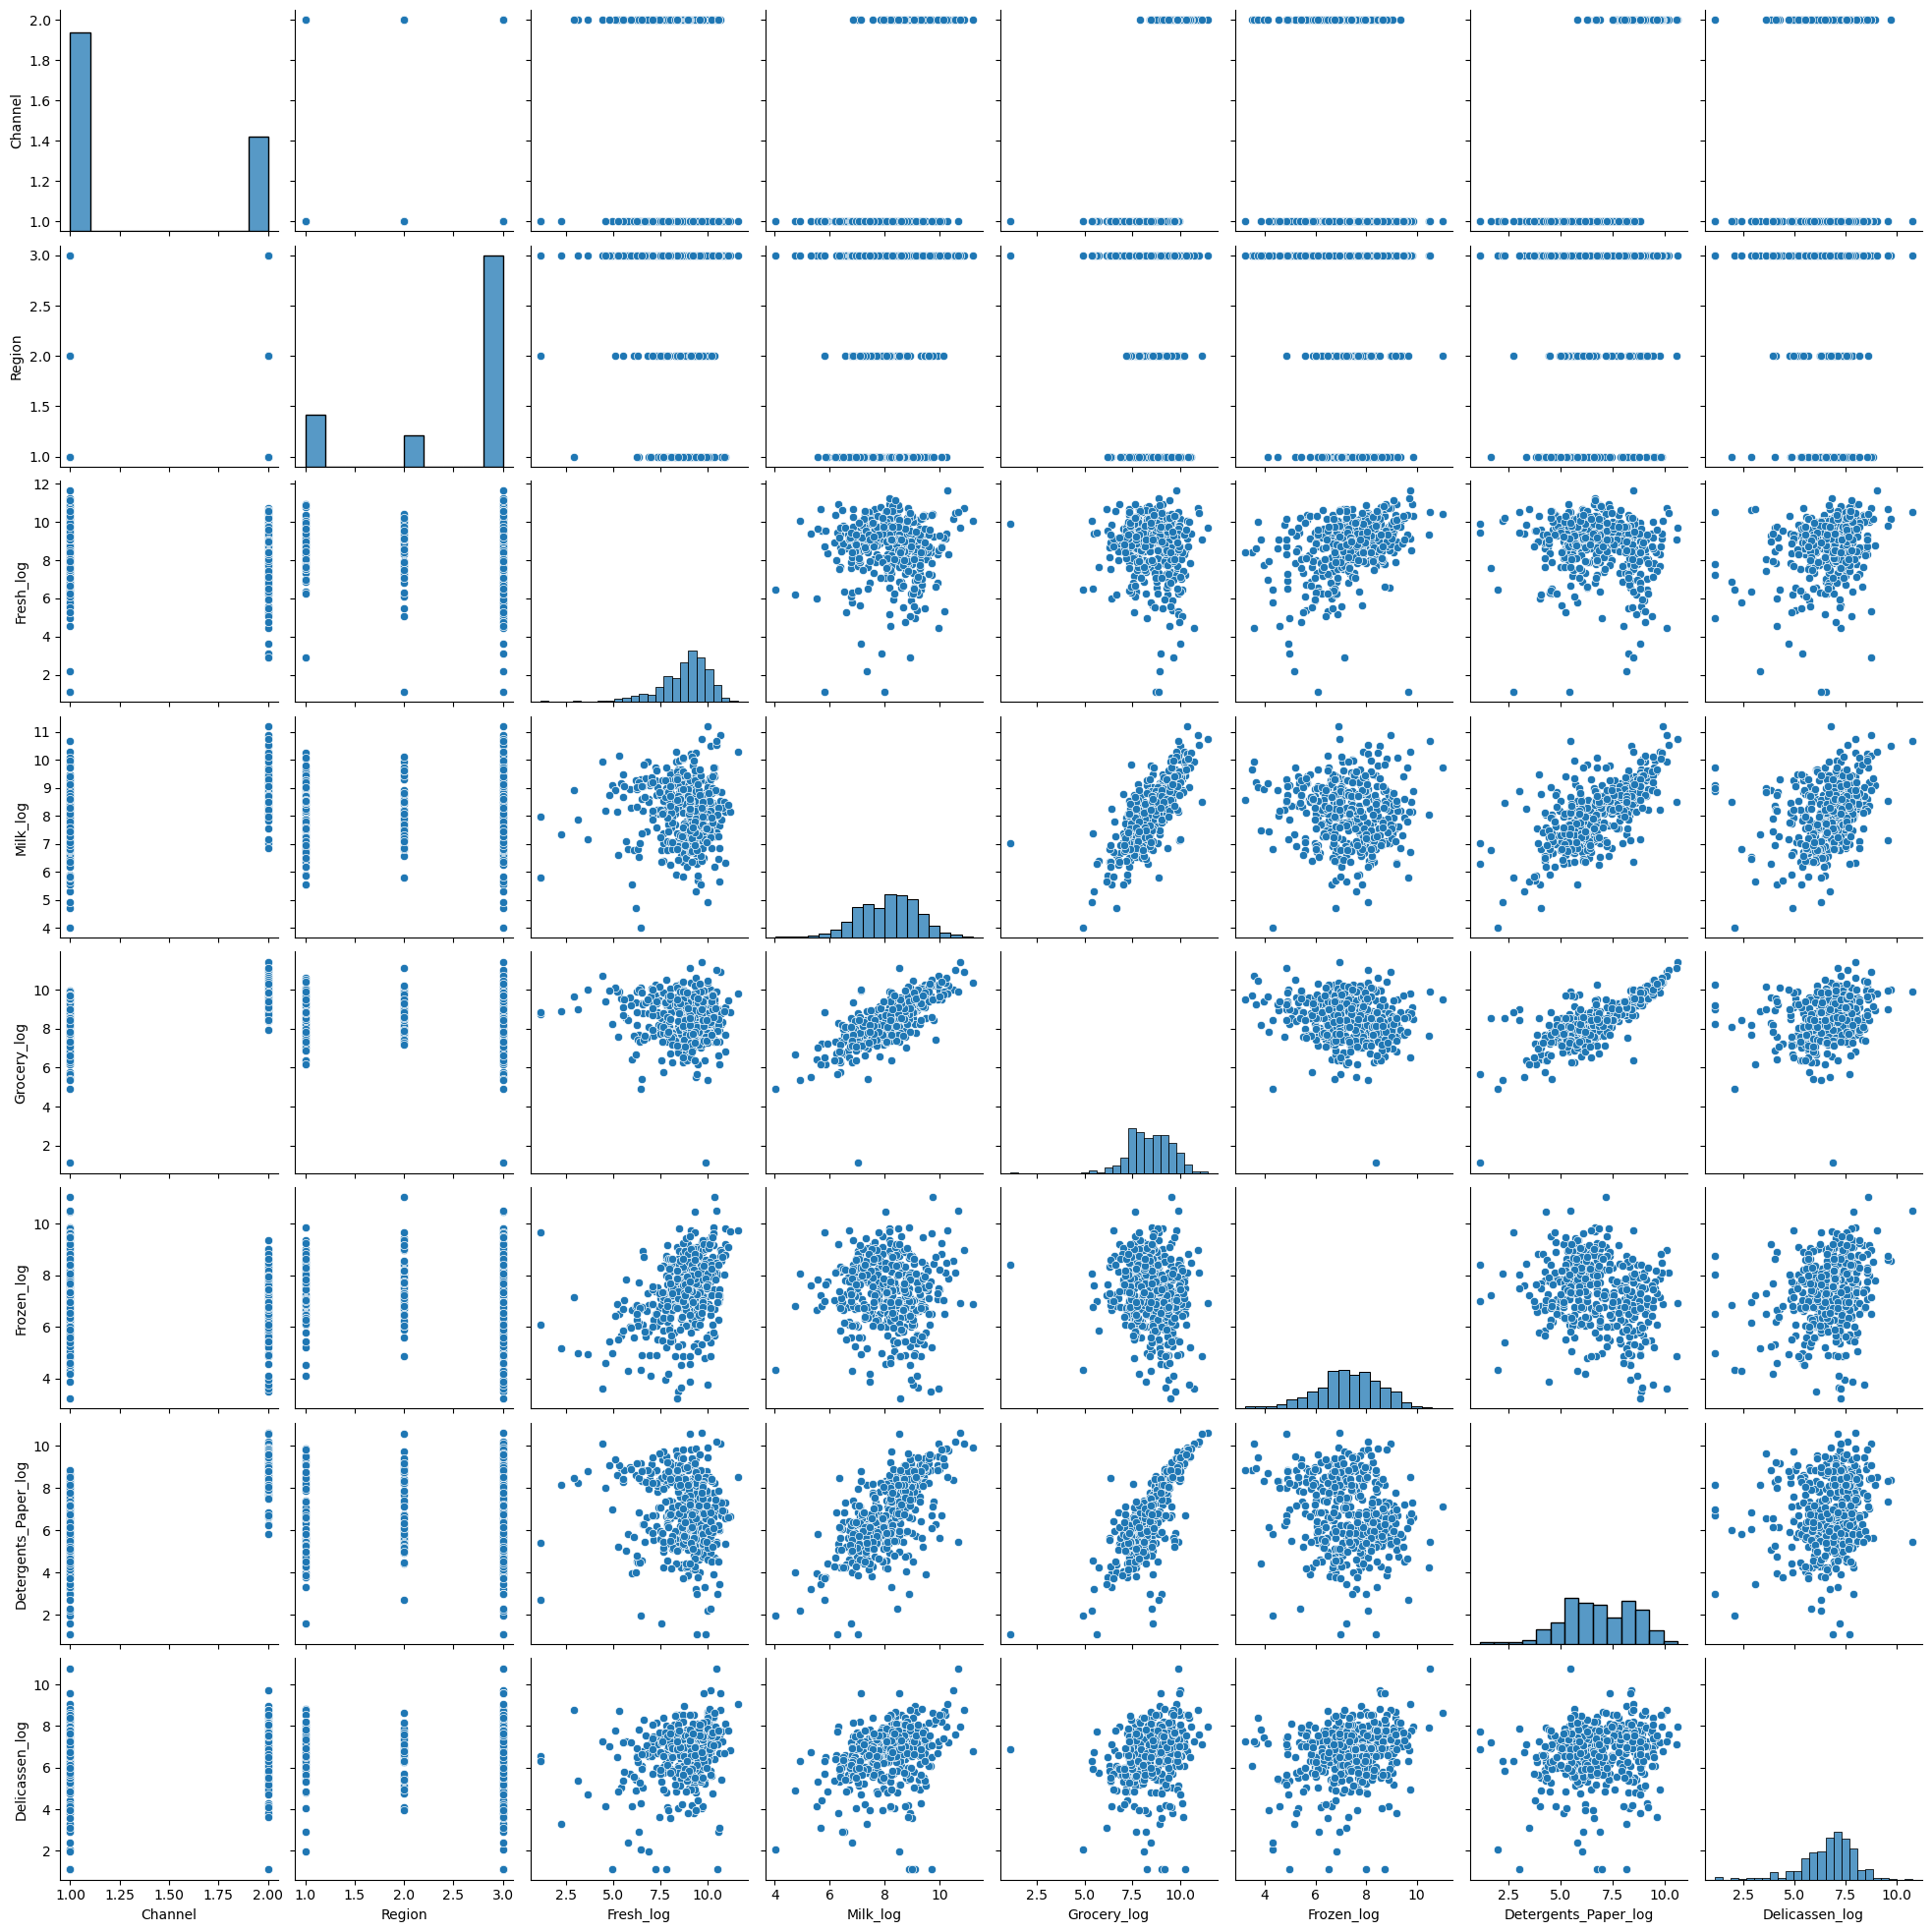

In [8]:
## Visualzie relationships again with Log transformed

sns.pairplot(data=data_raw_log)
plt.show()

In [22]:
data_raw_log.corr()

,Channel,Region,Fresh_log,Milk_log,Grocery_log,Frozen_log,Detergents_Paper_log,Delicassen_log
Channel,1.000000,0.062028,-0.168050,0.577156,0.660635,-0.244961,0.724456,0.130466
Region,0.062028,1.000000,0.013433,0.034195,0.001466,-0.085397,0.014386,-0.012041
Fresh_log,-0.168050,0.013433,1.000000,-0.019834,-0.132713,0.383996,-0.155871,0.255186
Milk_log,0.577156,0.034195,-0.019834,1.000000,0.758851,-0.055316,0.677942,0.337833
Grocery_log,0.660635,0.001466,-0.132713,0.758851,1.000000,-0.164524,0.796398,0.235728
Frozen_log,-0.244961,-0.085397,0.383996,-0.055316,-0.164524,1.000000,-0.211576,0.254718
Detergents_Paper_log,0.724456,0.014386,-0.155871,0.677942,0.796398,-0.211576,1.000000,0.166735
Delicassen_log,0.130466,-0.012041,0.255186,0.337833,0.235728,0.254718,0.166735,1.000000


<Axes: >

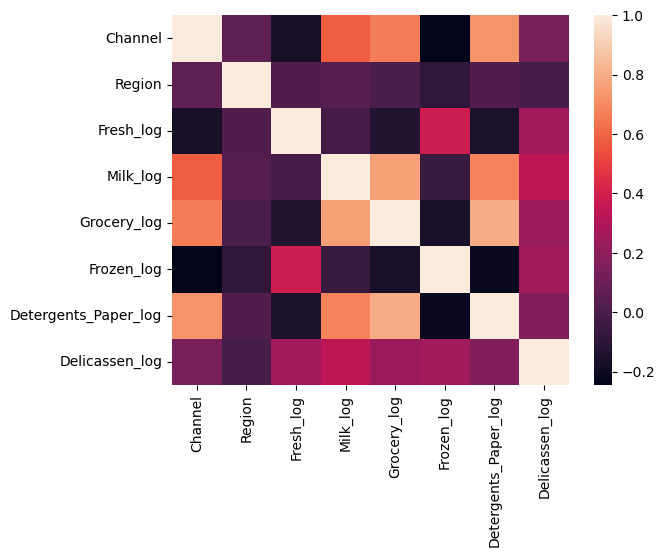

In [23]:
sns.heatmap(data_raw_log.corr())

## Dimensionality Reduction (PCA)

In this exercise, Principle Component Analysis (PCA) will be employed as a preprocessing step to make the visualization of clusters obtained through K-means, Heirarchal clustering and DBSCAN more manageable and insightful. Said differrently, we can visualize 2 dimensions; we cannot visualize 8 in our current data frame. 

**Approach for PCA:** 

1. Determine the optimal number of dimensions for the model using the Explained Variance ration as the metric.
2. Perform dimensionality reduction (fit)
3. Confirm the Explained Variance Ratio for the selected dimensions
4. Obtain the PC loadings (coefficients)
5. Rank the Features by importance
6. Visualize Feature importance 

### 1.Determine Optimum Dimensions for PCA

In [100]:
# X is our data declared in earlier section (aka: data_raw_log)
pca = PCA(n_components=None)  # Default will be None

# X_pca fit - dont transform...
X_pca_init = pca.fit(X)

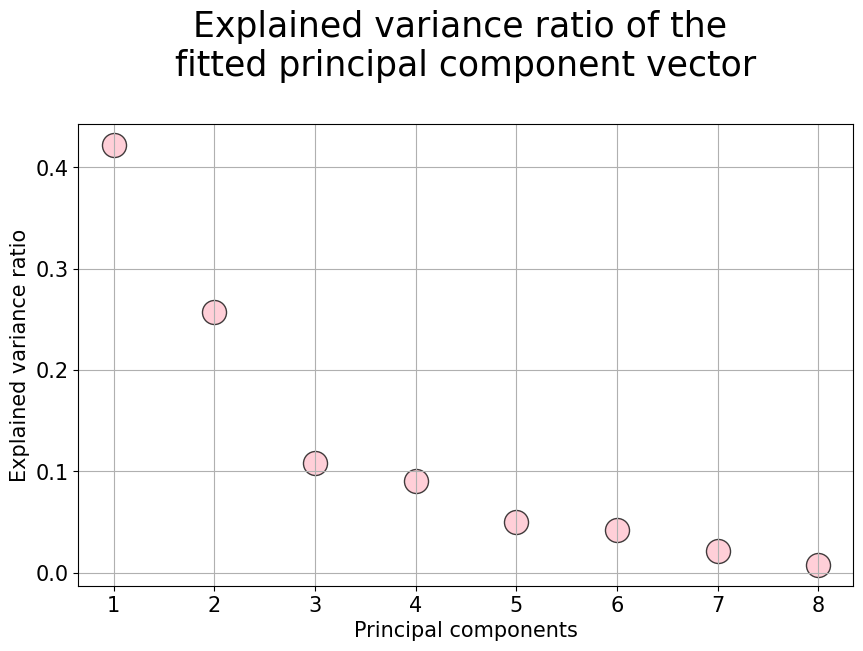

In [101]:
# A SKREE PLOT:
# Purpose - to determine if your PCA (is doing its job) 

plt.figure(figsize=(10,6))
plt.scatter(x=[i+1 for i in range(len(X_pca_init.explained_variance_ratio_))],
            y=X_pca_init.explained_variance_ratio_,
           s=300, alpha=0.75,c='pink',edgecolor='k')
plt.grid(True)
plt.title("Explained variance ratio of the \nfitted principal component vector\n",fontsize=25)
plt.xlabel("Principal components",fontsize=15)
plt.xticks([i+1 for i in range(len(X_pca_init.explained_variance_ratio_))],fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("Explained variance ratio",fontsize=15)
plt.show()

We can see from the Skee plot that the 'elbow' point is at PCA components = 3. This is the point at which there is diminishing returns on including additional Principle components. 

The Explained Variance approximates 0.11. The next step will fit to 3 PC and confirm the Explained Variance.

### 2.Fit PCA to the Optimal Components (n=3)

In [107]:
# X is our data declared in earlier section (aka: data_raw_log)
pca = PCA(n_components=3)  # Reduce to 3 principal components per our skree plot

X_pca = pca.fit(X)


### 3. Confirm Explained Variance

In [108]:

explained_variance_ratio = pca.explained_variance_ratio_
explained_variance_total = sum(explained_variance_ratio)

# Print the output of the Explained Variance for the PCs (and the total)
for i, ratio in enumerate(explained_variance_ratio, start=1):
    print(f'PC{i} accounts for {ratio:.2%} of the total variance')
print(f'The total variance accounted for is {explained_variance_total:.2%}')

# Our 8-dimension dataset has been reduced to 3 dimensions. This will now make cluster visualization possible. 

PC1 accounts for 42.21% of the total variance
PC2 accounts for 25.74% of the total variance
PC3 accounts for 10.85% of the total variance
The total variance accounted for is 78.79%


In [110]:
### 4. Obtain Principle Component Loadings

In [112]:
component_loadings = pca.components_
print(component_loadings)

[[-0.15923574 -0.00906142  0.17117903 -0.38896382 -0.44839138  0.17117897
  -0.73647337 -0.1456594 ]
 [ 0.00481134  0.01304125 -0.68428355 -0.16321084 -0.07047632 -0.48769959
  -0.04361026 -0.51010328]
 [-0.03404815 -0.06982662 -0.67773401  0.03471608 -0.02662213  0.29679588
  -0.20776452  0.63361956]]


In [113]:
### 5. Rank Features by Importance

In [114]:
feature_importance = np.sum(component_loadings**2, axis=0)
feature_importance

array([0.02653845, 0.00512794, 0.95686963, 0.17913584, 0.20673048,
       0.35524092, 0.58746098, 0.68289577])

### 6. Visualize Features & Importance


In [117]:
sorted_indices = np.argsort(feature_importance)[::-1]
top_n_features = sorted_indices[:8]  # N is the number of top features you want to visualize

print(top_n_features)

[2 7 6 5 4 3 0 1]


# Part II - KMeans Clustering

The objective of the analysis is to group similar products together into clusters based on their attributes such as fresh, milk, grocery, frozen, detergents_paper, and delicatessen. To perform the k-means clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters, initialize the centroids, assign data points to clusters, update the centroids, and repeat until convergence.

### Determining the Best Number of Centroids

Humans are adept at determining the number of clusters (or centroids) are present in a scatter plot. Our model is not as talented. In order to determine the appropriate or 'best' number of clusters... we simply try several. The results are evaluated using dispersion (dispersion = how far away are the data form the centroid). The model that had the least dispersion is selected. 

**Elbow Rule**

The toool for deciding how many clusters to choose is the elbow rule in a distortion plot. The data is fitted with various numbers of clusters and stores the distortion. Distortion, in `sklearn` called **inertia**.



In [39]:
# The Eblow Rule: 
## in the below function... 
'''
We set the max number of clusters. 
instantiate an empty list for the distortion value
iterate throught clusters from 1 to 10
fit the model and calculate the distortion
then append the distortion value to the empty list.

Plot: 
The distortions are then plotted
Wthen the plot begins to Flatten out - the elbow,
the number of clusters has been reached
'''

def plot_distortion(X,max_clusters = 10, ax=None):
    ## This IF is for later when we want to print all the plots together. 
    if ax is None:
        ax = plt.gca() #Get the current axis if none is provided
    
    distortions = []
    for i in range(1, max_clusters +1):
        km = KMeans(n_clusters=i,
                    init='k-means++',
                    n_init=10,
                    random_state=0)
        km.fit(X)
        distortions.append(km.inertia_)
        
    plt.plot(range(1,max_clusters +1), distortions, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.show() 

c:\Users\jamie\anaconda3\envs\Lighthouse_env\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\jamie\anaconda3\envs\Lighthouse_env\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\jamie\anaconda3\envs\Lighthouse_env\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\jamie\anaconda3\envs\Lighthouse_env\lib\site-packages\sklearn\clust

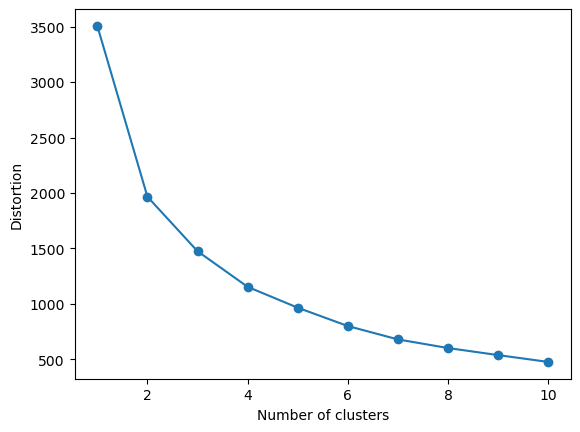

In [40]:
## Run the Elbow function! 
## Call X_pca

# elbow rule
plot_distortion(X_pca,max_clusters=10)


### Optimum Number of Centroids
From the above plot and function, we determine the optimum number of centroids is 3. This minimizes the dispersion between the centroids and the data points. 

In [29]:
# Fit the model

km = KMeans(n_clusters=4, # Originally, we had 3, but updated to 4 based on the Elbow 
            n_init=10, # how many initial runs
            random_state=0)

# Declare Y_K to fit and predict
y_km = km.fit_predict(X_pca)


c:\Users\jamie\anaconda3\envs\Lighthouse_env\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


### Plot the K-Means

>Original Approach invovled **Feature Selection**:     
>* We have a data set with several (8) features.   
>* For the simplicity/practical purposes, only 2 of these features are selected for plotting.  
>* The `Frozen` and `Detergents` features have been selected based on their correlation (see above). 

**Revised Approach:** 

The K-Means are plotted used the X_pca. In other words, the 8-dimension data set expressed as a 2-dimension. This will allow much easier visualization without introducing feature loss. 

In [76]:
## Define the function to create a KMeans plot (2 features)

# Now junk as using PCA => X_plotted_kmm = data_raw_log[['Milk_log', 'Frozen_log']].values

def plot_clusters(X,y_res, ax=None):
        ## This IF is for later when we want to print all the plots together. 
    # if ax != None:
    #     ax = plt.subplots()
    plt_cluster_centers= True
    X_centroids = []
    Y_centroids = []
    
    for cluster in set(y_res):
        x = X[y_res == cluster,0]
        y = X[y_res == cluster,1]
        X_centroids.append(np.mean(x))
        Y_centroids.append(np.mean(y))
        
        plt.scatter(x,
                    y,
                    s=50,
                    marker='s',
                    label=f'cluster {cluster}')
        
    if plt_cluster_centers:
        plt.scatter(X_centroids,
                    Y_centroids,
                    marker='*',
                    c='red',
                    s=250,
                    label='centroids')
    plt.legend()
    plt.grid()
    plt.show()

   


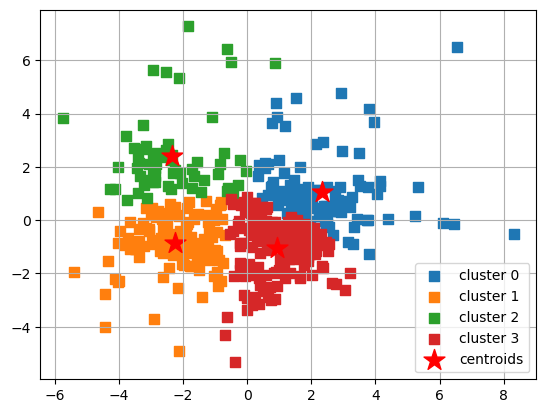

In [77]:
 # plot clustering result
plot_clusters(X_pca, y_km)


# Part III - Hierarchical Clustering 

_Hierarchical clustering_ is a general family of clustering algorithms that build nested clusters by merging or splitting them successively. This hierarchy of clusters is represented as an upside-down tree (a "dendrogram"). The root of the tree is the unique cluster that contains **all** the samples, with the leaves being the clusters with only one sample/observation. 

## General Interpretation of Dendrograms

**Height:**
The vertical axis (y-axis) of the dendrogram represents the distance or dissimilarity between clusters.  
The height at which branches merge or split indicates the distance at which clusters were combined or divided.  
Lower heights represent closer similarity or smaller distances.

**Horizontal Lines:**  
The position where a horizontal line connects two branches or clusters indicates the point at which those clusters were merged into a larger cluster.  

**Cluster Labels:**
As you move up the dendrogram from the leaves to the root, you can see how data points are grouped into clusters.  
You may not see specific labels for clusters on the dendrogram, but you can interpret them based on the structure and the height at which they merge.  

**Cluster Similarity:**  
Clusters that merge at lower heights on the dendrogram are more similar to each other in terms of the distance metric used for clustering.  
Clusters that merge at higher heights are less similar, and their merger may represent a higher-level grouping.
Cutting the Dendrogram:

**Determining the Target Clusters:**  
To obtain a specific number of clusters from a hierarchical clustering analysis, you can cut the dendrogram at a certain height.
The number of clusters you obtain depends on the height at which you cut the dendrogram.
You can choose a height that best suits your clustering objectives.

## Approach - Aggolomerative Clustering
The below dendrogram will focus on `Agglomerative clustering`.
It performs a hierarchical clustering using a bottom-up approach: each observation starts in its own cluster, and the clusters are successively merged together.

Agglomerative clusering involves using x,y coordinates (Euclidean) to find the distance between points using Pythagoras (A^2 = B^2 +C^2). We set the Euclidean distance to the `affinity` parameter and set the number of clusters initially to 3 based on the earlier KMeans. Additionally, the parameter (`linkage`) is set to minimize the sum of squared differences within all clusters `ward`.


In [19]:
# aglomerative clustering
from sklearn.cluster import AgglomerativeClustering

# cluster hierarchy
import scipy.cluster.hierarchy as sch

# create an object
ac = AgglomerativeClustering(affinity='euclidean',
                             linkage='ward',
                             n_clusters = 4)


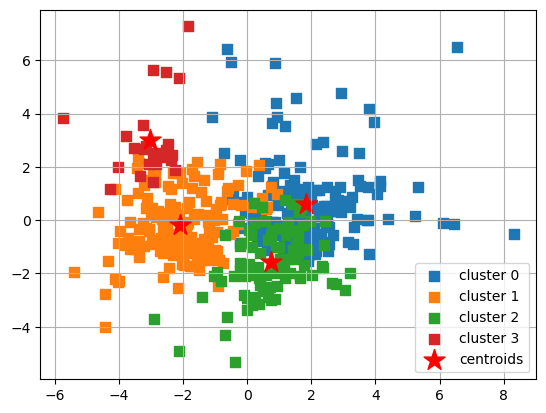

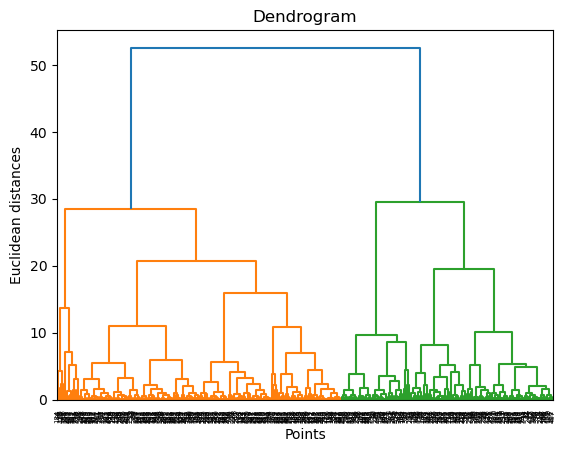

In [78]:
# Plot the clusters (n=4)

y_hc = ac.fit_predict(X)
plot_clusters(X_pca,y_hc)

# Plot the Dendrogram 

# define plot_dendrogram function
def plot_dendrogram(X, ax=None):
    method ='ward'
    
        ## This IF is for later when we want to print all the plots together. 
    # if ax is None:
    #     ax = plt.gca() #Get the current axis if none is provided
    dendrogram = sch.dendrogram(sch.linkage(X, method=method))
    plt.title("Dendrogram")
    plt.ylabel("Euclidean distances")
    plt.xlabel('Points')
    plt.show()

plot_dendrogram(X_pca)

# Part IV - DBSCAN

DBSCAN introduces two additional parameters. They are: 
* `eps`: The maximum distance between two samples for one to be considered as being in the neighborhood of the other. This is not a maximum bound on the distances of points within a cluster. It is the most important DBSCAN parameter to choose appropriately for our dataset and distance function.

* `min_samples`: The minimum number of samples in a neighborhood for a point to be considered as a core point. This includes the point itself.

In [34]:
#dbs_metrics
eps_ = 1.5
min_samples_ = 5
metric_ = 'euclidean'

db = DBSCAN(eps=eps_, min_samples=min_samples_, metric=metric_)

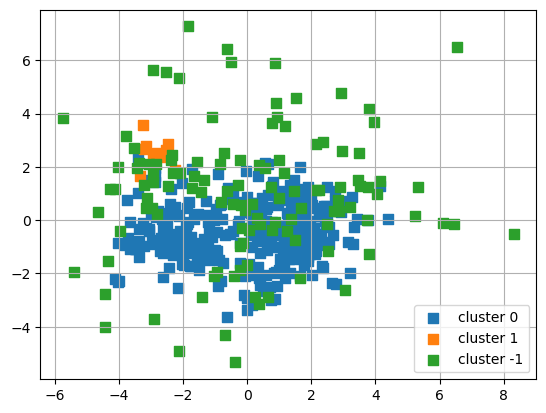

In [47]:
y_db = db.fit_predict(X)

plot_clusters(X_pca,y_db)


# Part IV - PCA

In this section you are going to perform principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

# Part V - Conclusion

From the model you developed and the exploratory data analysis (EDA) conducted, generate four bullet points as your findings.